# GROUP 18 PHASE 2 PROJECT

The group consists of the following members : 
1. PETER GADUEL
2. MAUREEN WANJERI
3. VERONICAH MUNYAO
4. VICTOR MAINA
5. GEOFFREY MWANGI

Student pace: Part Time 

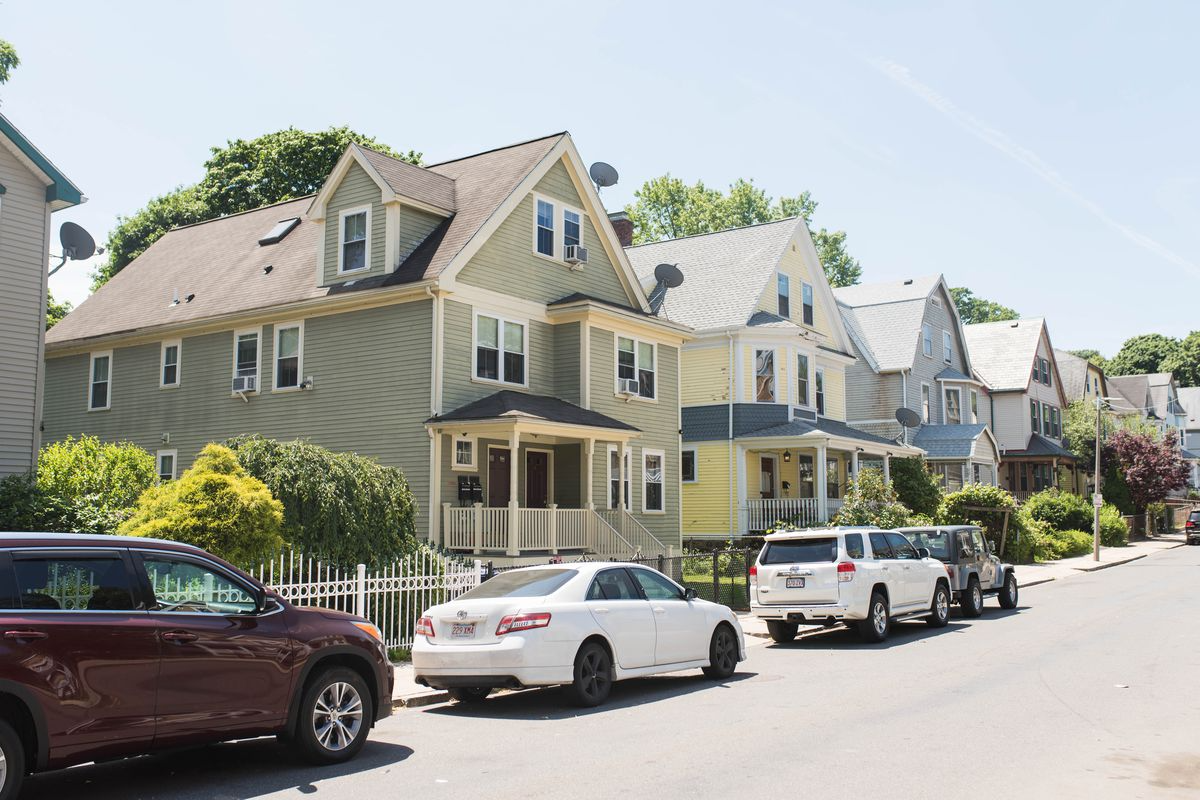

# **King County House Sales Price Prediction**

## Project Statement Overview
This project focuses on predicting house prices in King County, Washington, using regression modeling. The goal is to provide real estate agents with accurate pricing recommendations for homeowners looking to sell their properties as well as homebuyers looking to get a fair deal. By setting the right price, agents can attract more buyers and ensure a quicker sale.

### Stakeholder
- **Real Estate Agents:** The primary stakeholders who will benefit from accurate pricing recommendations to help homeowners sell their houses quickly and at competitive prices.


- **Buyers:** To understand the fair market value of a house.


- **Financial Analysts:** To assess market trends and property values.

### Objective
To develop a regression model that predicts the sale price of homes based on various features such as square footage, number of bedrooms, bathrooms, location, and other relevant variables.


## Data Understanding


### Data Sources


The dataset is sourced from [Kaggle's House Prices dataset]. It includes various features such as the number of bedrooms, square footage, and location.


### Dataset Overview

The data likely represents a two-dimensional dataset with 21597 rows and 21 columns.


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



### Feature Relevance
Each feature is included based on its potential impact on house prices. 

### Data Limitations
The dataset may have missing values and outliers that could affect the model's accuracy. Additionally, the data is limited to a specific geographic area, which may not generalize well to other locations.


## Approach
### Model Development: Use regression model to predict the sale price of homes.
Feature Analysis: Identify which features are the most influential in determining the price.
Prediction Accuracy: Evaluate model performance using metrics like Mean Squared Error (MSE) and R².



# Importing necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import plotly.express as px
sns.set_style("whitegrid")
%matplotlib inline

In [60]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

# EXPLORATORY DATA ANALYSIS

In [61]:
df.shape

(21597, 21)

In [62]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [63]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [65]:
# Converting the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [66]:
# Checking for any null/missing value
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [67]:
# Convert all columns to numeric, setting errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation
correlation = df.corr()['price'].sort_values()
print(correlation)

zipcode         -0.053402
id              -0.016772
date            -0.003998
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
sqft_basement    0.325008
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64


**Summary:**

Strongest Positive Correlations: sqft_living, grade, sqft_above, sqft_living15, bathrooms, view.

Moderate Positive Correlations: bedrooms, lat, sqft_basement, waterfront, floors.

Weak Positive Correlations: yr_renovated, sqft_lot, sqft_lot15, yr_built, condition. Very Weak or No Correlations: long, date, id, zipcode.

These results indicate that the most significant predictors of house prices in this dataset are related to the size and quality of the living space.

In [68]:
# drop the  columns we wont be using in the prediction target column(price) to check for correlation between independent variables
select_data = df.drop(["date", "sqft_basement", "yr_built", "yr_renovated" ,"zipcode", "lat", "long", "sqft_living15", "sqft_lot15","id","condition", "grade", "sqft_above"], axis=1)
select_data

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  
0             NaN   0.0  
1             0.0   0.0  
2             0.0   0.0  
3             0.0   0.0  
4             0.0   0.0  
...           ...   ...  
21592         0.0   0.0  
21593         0.0   0.0  
21594         0.0   0.0  
21595         NaN   0.0  
21596         0.0   0.0  

[21597 rows x 8 columns]

In [69]:
#drop missing values
select_data.dropna(inplace=True)
select_data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
dtype: int64

In [70]:
#Find correlation between predictor variables and  price
correlation = select_data.corr()
correlation

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price        1.000000  0.309057   0.526609     0.704428  0.087430  0.258797   
bedrooms     0.309057  1.000000   0.516137     0.577972  0.029685  0.181909   
bathrooms    0.526609  0.516137   1.000000     0.755909  0.085666  0.506058   
sqft_living  0.704428  0.577972   0.755909     1.000000  0.173624  0.356938   
sqft_lot     0.087430  0.029685   0.085666     0.173624  1.000000 -0.007519   
floors       0.258797  0.181909   0.506058     0.356938 -0.007519  1.000000   
waterfront   0.270982 -0.004082   0.064608     0.107416  0.023164  0.021399   
view         0.395766  0.083542   0.186980     0.285976  0.071064  0.029147   

             waterfront      view  
price          0.270982  0.395766  
bedrooms      -0.004082  0.083542  
bathrooms      0.064608  0.186980  
sqft_living    0.107416  0.285976  
sqft_lot       0.023164  0.071064  
floors         0.021399  0.029147  
waterfront     1.000000  0.406654  
view           0.406654  1.000000

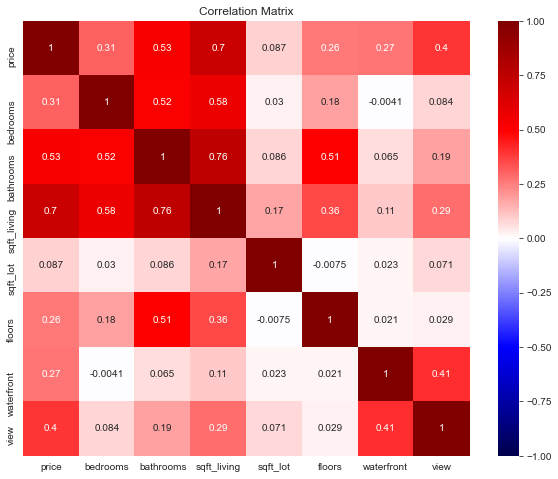

In [71]:

#Find correlation between predictor variables and  price
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **Key High Correlations:**


price:

sqft_living: Strong positive correlation (0.7) — As the square footage of the living area increases, the price tends to increase.
bathrooms: Moderate positive correlation (0.53) — Houses with more bathrooms tend to be priced higher.


bedrooms:

bathrooms: Strong positive correlation (0.52) — Houses with more bedrooms often have more bathrooms.
sqft_living: Moderate positive correlation (0.58) — More bedrooms are associated with larger living areas.


bathrooms:

sqft_living: Strong positive correlation (0.76) — More bathrooms are typically found in houses with larger living areas.


sqft_living:

bathrooms: Strong positive correlation (0.76) — More bathrooms are typically found in houses with larger living areas.
price: Strong positive correlation (0.7) — Larger living areas are associated with higher prices.


### **Summary of High Correlations:**


Price is most strongly correlated with sqft_living and bathrooms.


Bedrooms are strongly correlated with bathrooms and moderately correlated with sqft_living.


Bathrooms show a strong correlation with both sqft_living and bedrooms.


Sqft_living has strong positive correlations with both bathrooms and price.


These high correlations suggest that the size of the living area and the number of bathrooms are key factors influencing house prices and the number of bedrooms.








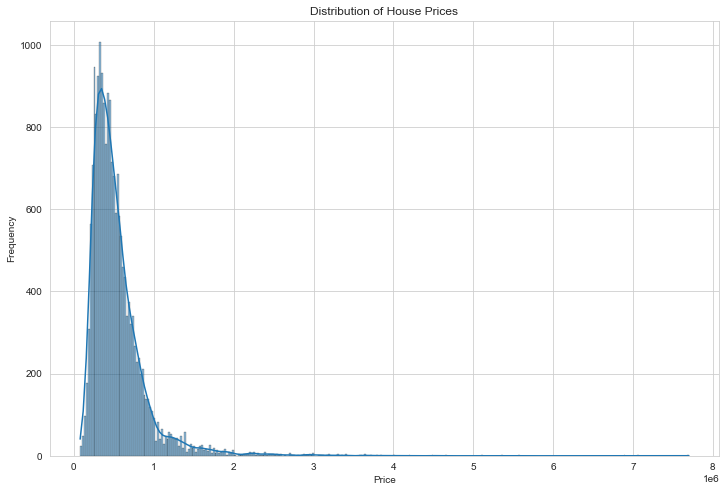

In [72]:
# Distribution of house prices
plt.figure(figsize=(12, 8))
sns.histplot(select_data['price'], kde=True , edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Summary:


Most houses are priced within a lower range, with a decreasing number of houses as the price increases.


The distribution is heavily right-skewed, indicating that while high-priced houses exist, they are much less common.


The presence of outliers on the higher end of the price range should be taken into account in further analyses, as they can significantly impact statistical measures such as mean and standard deviation.

In [73]:
select_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view'],
      dtype='object')

In [74]:
# Selected columns
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view']
df_selected = df[columns]

In [75]:
continuous_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

In [76]:
categorical_vars = ['floors', 'waterfront', 'view']


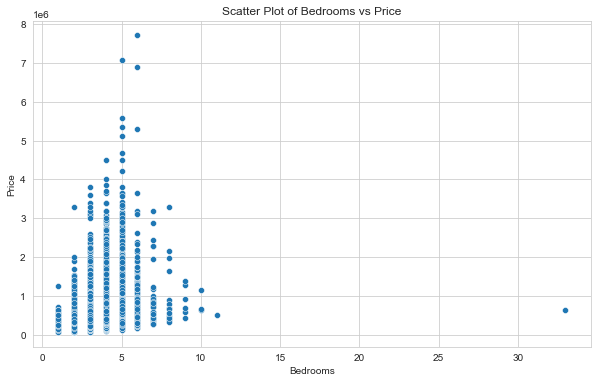

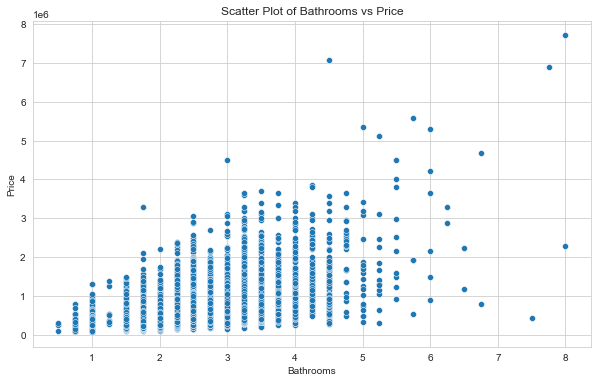

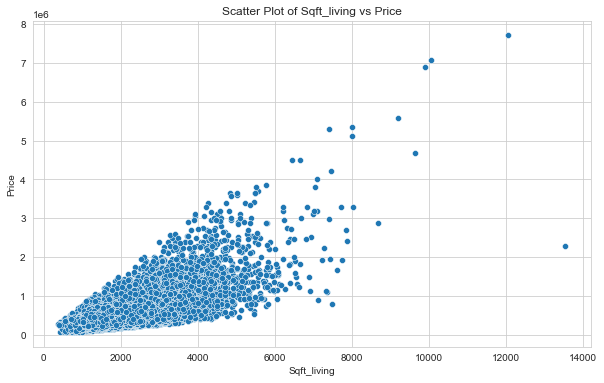

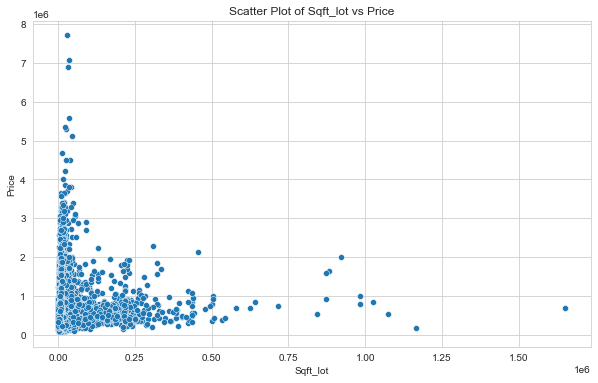

In [77]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='price', data=df_selected)
    plt.title(f'Scatter Plot of {var.capitalize()} vs Price')
    plt.xlabel(var.capitalize())
    plt.ylabel('Price')
    plt.show()

### **The scatter plot of Bedrooms vs. Price **


Most houses have 3 to 6 bedrooms, with prices generally increasing up to 6 bedrooms. Beyond 6 bedrooms, prices do not show a clear trend. There are a few outliers with extremely high prices and an unusual property with over 30 bedrooms. Overall, the number of bedrooms is not strictly linearly related to house prices, indicating other significant influencing factors.

Scatter Plot of Bathrooms vs Prices


The scatter plot of bathrooms vs. prices shows a general positive correlation, indicating that homes with more bathrooms tend to be priced higher. Most homes have between 1 to 4 bathrooms, with prices generally up to 3 million. There is significant price variability within this range, suggesting other factors also influence prices. A few outliers with very high prices and many bathrooms indicate rare, high-value properties.

Scatter Plot of Sqft_living vs. Price


The scatter plot shows a strong positive correlation between the living area (in square feet) and the price, indicating that larger homes generally have higher prices. Most data points are concentrated between 1,000 and 4,000 square feet, with prices typically up to 2 million. There are some outliers with exceptionally large living areas (above 10,000 sqft) and high prices (above 5 million), highlighting rare, high-value properties. This suggests that while living area is a key factor in determining price, other factors also play a significant role.

Scatter Plot of Sqft_lot vs. Price


The scatter plot shows a weak positive correlation between lot size and price, with most properties clustered below 0.25 million sqft and priced under 2 million. Beyond 0.25 million sqft, fewer data points and lower price variability suggest that lot size alone is not a strong determinant of property value.

In [78]:
df_selected['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

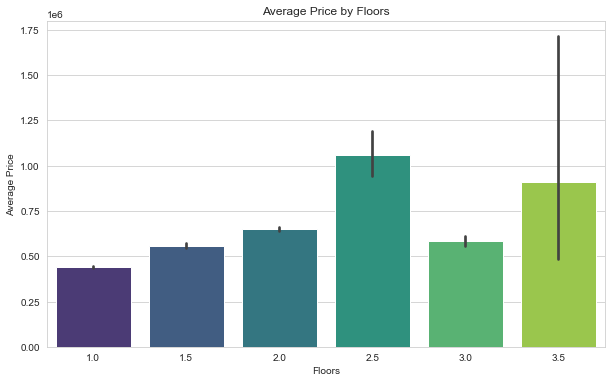

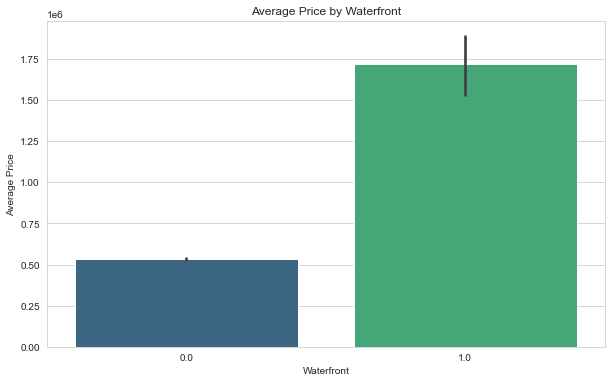

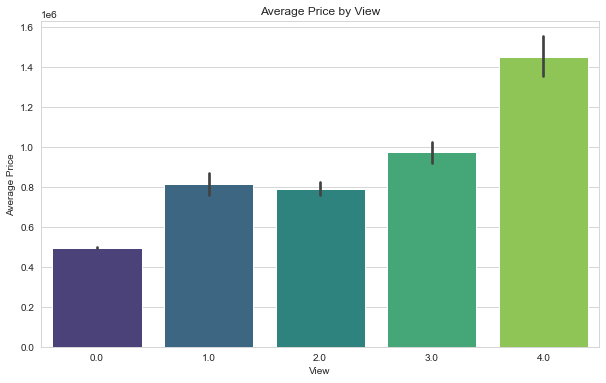

In [79]:
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='price', data=df_selected, palette='viridis')
    plt.title(f'Average Price by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Average Price')
    plt.show()

The bar chart displays the average price of properties based on the number of floors. It shows that properties with 2.5 floors have the highest average price, followed by those with 3.5 floors, while properties with 1 floor have the lowest average price. The error bars indicate the variability in prices for each category, with the 3.5 floors category showing the highest variability.


The bar chart illustrates the average price of properties based on their waterfront status. Properties with waterfront views (denoted by 1) have significantly higher average prices compared to those without waterfront views (denoted by 0). The error bar for waterfront properties indicates a higher variability in prices, suggesting a wider range of property values in this category.


The bar chart shows the average price of properties based on their view rating, ranging from 0 to 4. Properties with the highest view rating (4) have the highest average price, followed by those with a rating of 3, indicating a clear positive correlation between view quality and property price. The error bars suggest some variability in prices within each view category, with higher ratings showing slightly more variation.

### Finding Outliers

In [80]:

columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view']



In [81]:
# Plotting for 'price' column
fig_price = px.box(data_frame=df_selected, y='price', title="Boxplot for Price")
fig_price.update_traces(marker_color='#1f77b4')  # Using default Plotly blue color
fig_price.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red"
)
fig_price.show()

In [82]:
# Plotting for 'bedrooms' column
fig_bedrooms = px.box(data_frame=df_selected, y='bedrooms', title="Boxplot for Bedrooms")
fig_bedrooms.update_traces(marker_color='#ff7f0e')  # Using default Plotly orange color
fig_bedrooms.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red"
)
fig_bedrooms.show()


In [83]:
# Plotting for 'bathrooms' column
fig_bathrooms = px.box(data_frame=df_selected, y='bathrooms', title="Boxplot for Bathrooms")
fig_bathrooms.update_traces(marker_color='#2ca02c')  # Using default Plotly green color
fig_bathrooms.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    height=600,  # Adjust the height as needed
    width=800,   # Adjust the width as needed
)
fig_bathrooms.show()

In [84]:
# Plotting for 'sqft_living' column
fig_sqft_living = px.box(data_frame=df_selected, y='sqft_living', title="Boxplot for Sqft Living")
fig_sqft_living.update_traces(marker_color='#d62728')  # Using default Plotly red color
fig_sqft_living.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red"
)
fig_sqft_living.show()

In [85]:
# Plotting for 'sqft_lot' column
fig_sqft_lot = px.box(data_frame=df_selected, y='sqft_lot', title="Boxplot for Sqft Lot")
fig_sqft_lot.update_traces(marker_color='#9467bd')  # Using default Plotly purple color
fig_sqft_lot.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red"
)
fig_sqft_lot.show()

In [86]:
# Plotting for 'floors' column
fig_floors = px.box(data_frame=df_selected, y='floors', title="Boxplot for Floors")
fig_floors.update_traces(marker_color='#8c564b')  # Using default Plotly brown color
fig_floors.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red"
)
fig_floors.show()


In [87]:

corr = df_selected.corr()['price'].sort_values()
print(corr)

sqft_lot       0.089876
floors         0.256804
waterfront     0.276295
bedrooms       0.308787
view           0.395734
bathrooms      0.525906
sqft_living    0.701917
price          1.000000
Name: price, dtype: float64


In [88]:
select_data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
dtype: int64

# MODEL TRAINING AND EVALUATION

**Split the dataset into dependent/independent variables**

In [89]:
x = select_data.drop(['price'], axis=1)

In [90]:
y = select_data["price"]

In [91]:
x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view
1             3       2.25         2570      7242     2.0         0.0   0.0
2             2       1.00          770     10000     1.0         0.0   0.0
3             4       3.00         1960      5000     1.0         0.0   0.0
4             3       2.00         1680      8080     1.0         0.0   0.0
5             4       4.50         5420    101930     1.0         0.0   0.0
...         ...        ...          ...       ...     ...         ...   ...
21591         3       2.50         1310      1294     2.0         0.0   0.0
21592         3       2.50         1530      1131     3.0         0.0   0.0
21593         4       2.50         2310      5813     2.0         0.0   0.0
21594         2       0.75         1020      1350     2.0         0.0   0.0
21596         2       0.75         1020      1076     2.0         0.0   0.0

[19164 rows x 7 columns]

In [92]:
y

1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 19164, dtype: float64

In [93]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (19164, 7)
Shape of y: (19164,)


## **Split the dataset into Train/Test sets**

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [95]:
print("Shape of x:", x.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y:", y.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x: (19164, 7)
Shape of x_train: (14373, 7)
Shape of x_test: (4791, 7)
Shape of y: (19164,)
Shape of y_train: (14373,)
Shape of y_test: (4791,)


### Simple Linear

Using sqft_living as the only predictor

In [96]:
# Simple Linear Regression
x_train_simp = x_train[['sqft_living']]
x_test_simp = x_test[['sqft_living']]

lin_reg_simp = LinearRegression()
lin_reg_simp.fit(x_train_simp, y_train)

y_pred_simp = lin_reg_simp.predict(x_test_simp)

In [97]:
mse_simp = mean_squared_error(y_test, y_pred_simp)
r2_simp = r2_score(y_test, y_pred_simp)

print("Simple Linear Regression:")
print(f"Mean Squared Error: {mse_simp}")
print(f"R^2 Score: {r2_simp}")

Simple Linear Regression:
Mean Squared Error: 76546916167.63615
R^2 Score: 0.5034236135183026


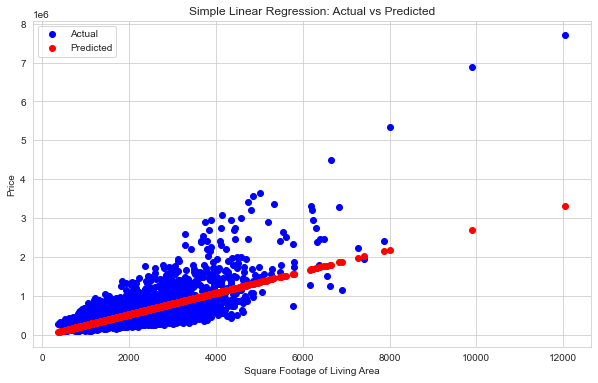

In [98]:
# Visualize the simple linear regression results
plt.figure(figsize=(10, 6))
plt.scatter(x_test_simp, y_test, color='blue', label='Actual')
plt.scatter(x_test_simp, y_pred_simp, color='red', label='Predicted')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [99]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
x_train_scaled = scaler.fit_transform(x_train_simp)
x_test_scaled = scaler.transform(x_test_simp)

# Simple Linear Regression with scaled data
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(x_train_scaled, y_train)

# Predict using the scaled testing data
y_pred_scaled = lin_reg_scaled.predict(x_test_scaled)

In [100]:
mse_simp_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_simp_scaled = r2_score(y_test, y_pred_scaled)

print("Scaled Simple Linear Regression:")
print(f"Mean Squared Error: {mse_simp}")
print(f"R^2 Score: {r2_simp}")

Scaled Simple Linear Regression:
Mean Squared Error: 76546916167.63615
R^2 Score: 0.5034236135183026


### Multiple Linear Regression

In [101]:
linear_reg_multi = LinearRegression()
linear_reg_multi.fit(x_train, y_train)

y_pred_multi = linear_reg_multi.predict(x_test)

In [102]:
mse_multilinear = mean_squared_error(y_test, y_pred_multi)
r2_multilinear = r2_score(y_test, y_pred_multi)

print("Multi Linear Regression:")
print(f"Mean Squared Error: {mse_multilinear}")
print(f"R^2 Score: {r2_multilinear}")

Multi Linear Regression:
Mean Squared Error: 65344853481.9221
R^2 Score: 0.5760938148551036


## **Business Conclusions:**


## **Model Performance:**

The Multiple Linear Regression model significantly outperforms the Simple Linear Regression model in terms of both Mean Squared Error (MSE) and R^2 Score.

A lower MSE indicates that the Multiple Linear Regression model has a better fit to the data and makes more accurate predictions.

A higher R^2 score (0.576 compared to 0.503) suggests that the Multiple Linear Regression model explains a greater proportion of the variance in the dependent variable, making it a more reliable model for predicting outcomes.


 # **Multiple Linear Regression Implementation:**
 
 

1. Initial Features Based on High Correlation with Target Variable: 



sqft_living, bathrooms, and view have higher correlations with price.


2. Incremental Addition of Features:



We will start with a few key features and incrementally add more to observe the changes in model performance.


3. Multiple Models with Different Combinations:



We will create models with different combinations of features to balance between predictive power and multicollinearity.

In [103]:
# Select relevant features and target variable
X = select_data[['sqft_living', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors']]
y = select_data['price']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# a function to build and evaluate a linear regression model
def evaluate_model(features):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [106]:
# Model 1: Using 'sqft_living' and 'bathrooms' (highly correlated with each other)
features_1 = ['sqft_living', 'bathrooms']
mse_1, r2_1 = evaluate_model(features_1)

In [107]:
# Model 2: Using 'sqft_living', 'bathrooms', and 'view'
features_2 = ['sqft_living', 'bathrooms', 'view']
mse_2, r2_2 = evaluate_model(features_2)

In [108]:
# Model 3: Using 'sqft_living', 'bathrooms', 'view', and 'bedrooms'
features_3 = ['sqft_living', 'bathrooms', 'view', 'bedrooms']
mse_3, r2_3 = evaluate_model(features_3)

In [109]:
# Model 4: Using 'sqft_living', 'bathrooms', 'view', 'bedrooms', and 'waterfront'
features_4 = ['sqft_living', 'bathrooms', 'view', 'bedrooms', 'waterfront']
mse_4, r2_4 = evaluate_model(features_4)

In [110]:
# Model 5: Using all selected features
features_5 = ['sqft_living', 'bathrooms', 'view', 'bedrooms', 'waterfront', 'floors']
mse_5, r2_5 = evaluate_model(features_5)

In [111]:
# Print the evaluation metrics for each model
print(f"Model 1 (sqft_living, bathrooms): MSE = {mse_1:.2f}, R2 = {r2_1:.2f}")
print(f"Model 2 (sqft_living, bathrooms, view): MSE = {mse_2:.2f}, R2 = {r2_2:.2f}")
print(f"Model 3 (sqft_living, bathrooms, view, bedrooms): MSE = {mse_3:.2f}, R2 = {r2_3:.2f}")
print(f"Model 4 (sqft_living, bathrooms, view, bedrooms, waterfront): MSE = {mse_4:.2f}, R2 = {r2_4:.2f}")
print(f"Model 5 (all features): MSE = {mse_5:.2f}, R2 = {r2_5:.2f}")


Model 1 (sqft_living, bathrooms): MSE = 74105180787.93, R2 = 0.51
Model 2 (sqft_living, bathrooms, view): MSE = 67605614145.05, R2 = 0.55
Model 3 (sqft_living, bathrooms, view, bedrooms): MSE = 66121880859.50, R2 = 0.56
Model 4 (sqft_living, bathrooms, view, bedrooms, waterfront): MSE = 64936233513.29, R2 = 0.57
Model 5 (all features): MSE = 64892342919.93, R2 = 0.57


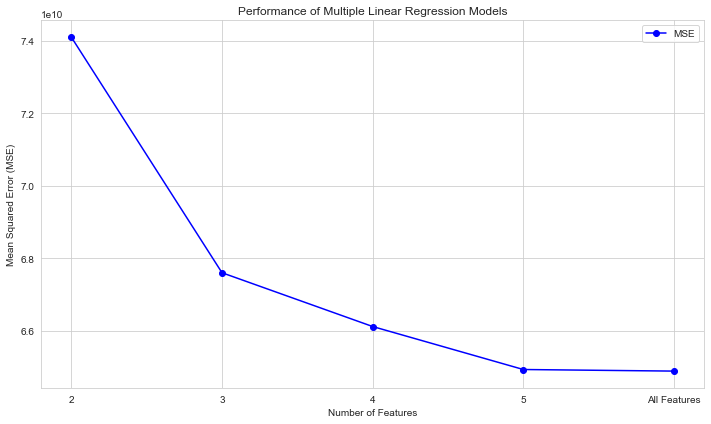

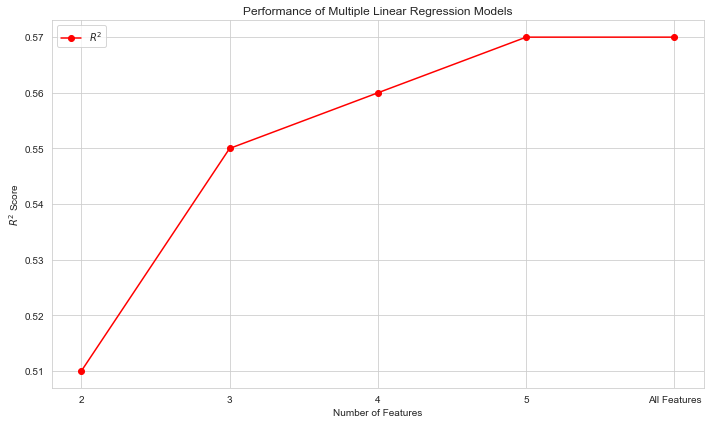

In [113]:
# Model details
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
features_count = [2, 3, 4, 5, 6]  # Update to numerical values for tick positions
mse_values = [74105180787.93, 67605614145.05, 66121880859.50, 64936233513.29, 64892342919.93]
r2_scores = [0.51, 0.55, 0.56, 0.57, 0.57]

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.plot(features_count, mse_values, marker='o', linestyle='-', color='b', label='MSE')
plt.title('Performance of Multiple Linear Regression Models')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(features_count, ['2', '3', '4', '5', 'All Features'])  # Update labels here
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting R^2 scores
plt.figure(figsize=(10, 6))
plt.plot(features_count, r2_scores, marker='o', linestyle='-', color='r', label='$R^2$')
plt.title('Performance of Multiple Linear Regression Models')
plt.xlabel('Number of Features')
plt.ylabel('$R^2$ Score')
plt.xticks(features_count, ['2', '3', '4', '5', 'All Features'])  # Update labels here
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Explanation of Results


**Model 1 (sqft_living, bathrooms):**

MSE (Mean Squared Error): 774105180787.93
R² (R-squared): 0.51


Interpretation:

MSE: This indicates the average squared difference between the predicted prices and the actual prices. A higher MSE suggests that the model's predictions are further from the actual values.
R²: This value indicates that 51% of the variability in the house prices can be explained by the features sqft_living and bathrooms.


**Model 2 (sqft_living, bathrooms, view):**

MSE: 67605614145.05
R²: 0.55


Interpretation:

MSE: The MSE has decreased compared to Model 1, indicating improved prediction accuracy.
R²: This model explains 55% of the variability in house prices, showing that adding the view feature improves the model's explanatory power.


**Model 3 (sqft_living, bathrooms, view, bedrooms):**

MSE: 66121880859.50
R²: 0.56


Interpretation:

MSE: The MSE has decreased further, suggesting even better predictions.
R²: This model explains 56% of the variability in house prices, indicating a slight improvement over Model 2 by adding bedrooms.


**Model 4 (sqft_living, bathrooms, view, bedrooms, waterfront):**

MSE: 64936233513.29
R²: 0.57


Interpretation:

MSE: The MSE continues to decrease, indicating that the model's predictions are becoming more accurate.
R²: This model explains 57% of the variability in house prices. Adding waterfront improves the model slightly.


**Model 5 (all features: sqft_living, bathrooms, view, bedrooms, waterfront, floors):**

MSE: 64892342919.93
R²: 0.57


Interpretation:

MSE: The MSE is slightly lower than in Model 4, indicating marginally better predictions.
R²: This model also explains 57% of the variability in house prices. Adding floors does not significantly improve the model's explanatory power.

**Summary of Results:**

Model 1: Using only sqft_living and bathrooms, we explain 51% of the variability in prices with a relatively high MSE.


Model 2: Adding view improves the model to explain 55% of the variability and reduces the MSE.


Model 3: Further adding bedrooms improves the model slightly more, explaining 56% of the variability and reducing the MSE.


Model 4: Including waterfront improves the model slightly, explaining 57% of the variability and reducing the MSE further.


Model 5: Including all features (adding floors) does not significantly improve the model over 
Model 4, with the R² remaining at 57% and a slight decrease in MSE.

**Conclusion:**


Incremental Improvement: Each step of adding a new feature generally improves the model, reducing the MSE and increasing R².


Best Model: Model 4 and Model 5 both explain 57% of the variability in house prices with a slight difference in MSE. Therefore, Model 4 can be considered optimal for its simplicity and performance.

# **Recommendations**


Recommendations for Real Estate Agents
Based on the regression analysis, we can provide the following recommendations to real estate agents:

1. Focus on Living Space (sqft_living)


Recommendation: Emphasize the total living space in marketing materials. Houses with larger living areas are highly valued.





2. Enhance Property Grade and Condition


Recommendation: Invest in improvements that can increase the overall grade and condition of the property.





3. Capitalize on Waterfront and Views


Recommendation: If the property has a waterfront view or high-quality view, make sure to highlight this feature prominently.




4. Promote Bathroom Additions


Recommendation: Properties with more bathrooms tend to have higher prices.


